# **Capstone Project: Analisis dataset Indonesia's Trending Youtube Video Statistics**

**Tujuan:**
Proyek ini bertujuan untuk menganalisis tren video YouTube di Indonesia dan mengidentifikasi channel serta konten dengan performa terbaik menggunakan eksplorasi data berbasis LLM.

**1. Instalasi dan Setup**

In [64]:
!pip install langchain_community
!pip install replicate
!pip install langchain langchain-experimental

**2. Load Model IBM Granite via Replicate**

In [65]:
import os
from google.colab import userdata

api_token = userdata.get("api_token")
os.environ["REPLICATE_API_TOKEN"] = api_token

In [66]:
from langchain.llms import Replicate
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent

parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 4096,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0.2,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}

llm=Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    model_kwargs = parameters,
)

**3. Load Dataset**

Dataset: https://www.kaggle.com/datasets/syahrulhamdani/indonesias-trending-youtube-video-statistics?select=trending.csv

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca hanya 100 baris pertama, lewati baris rusak
df = pd.read_csv("trending_clean.csv", on_bad_lines='skip', nrows=10)

# Tampilkan 5 baris pertama untuk validasi
df.head()

,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,live_status,local_title,local_description,duration,dimension,definition,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,NaN,2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",25,none,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",PT42M30S,2d,hd,False,True,NaN,NaN,885038,6765,1263,0,6365,2021-02-07 05:46:51.832649+00:00
1,NaN,2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",2,none,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,PT46M43S,2d,hd,False,True,NaN,NaN,889708,47895,532,0,8785,2021-02-07 05:46:51.832664+00:00
2,NaN,2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,20,none,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,PT45M59S,2d,hd,False,True,NaN,NaN,1006854,91973,3967,0,12957,2021-02-07 05:46:51.832678+00:00
3,NaN,2021-02-03T12:00:03Z,UC6FjcBcH9NVHdfFSvNfHmuA,SEMPROD: RAFFI AHMAD NONGKRONG SAMA GADING UUS...,"Halo Temen GUA & Cah BAGUS,\nEpisode sangat sp...",NaN,NaN,NaN,KUY Entertainment,"['KUY Entertainment', 'KUY Media', 'KUY', 'raf...",24,none,SEMPROD: RAFFI AHMAD NONGKRONG SAMA GADING UUS...,"Halo Temen GUA & Cah BAGUS,\nEpisode sangat sp...",PT1H2M51S,2d,hd,False,True,NaN,NaN,1807529,63530,978,0,5608,2021-02-07 05:46:51.832751+00:00
4,NaN,2021-02-02T13:39:46Z,UCRVhCi6T_-Ogs9MPDh3kX1w,"Moeldoko Sebut Datang Atas Nama Pribadi, Andi ...","Apa Kabar Indonesia - Jakarta, tvOnenews.com -...",NaN,NaN,NaN,Apa Kabar Indonesia tvOne,"['tvone', 'tvonenews', 'tv one', 'tvone live',...",25,none,"Moeldoko Sebut Datang Atas Nama Pribadi, Andi ...","Apa Kabar Indonesia - Jakarta, tvOnenews.com -...",PT20M43S,2d,hd,False,True,NaN,NaN,1493171,8672,1694,0,9751,2021-02-07 05:46:51.832766+00:00


**4. Pra-Pemrosesan Data Sederhana**

In [68]:
# Cek kolom yang tersedia
print(df.columns)

# Ambil kolom penting dan perbaiki nama kolom sesuai yang tersedia
df_clean = df[['title', 'channel_name', 'category_id', 'view', 'like', 'comment']].dropna()

# Urutkan berdasarkan jumlah view tertinggi
df_clean = df_clean.sort_values(by='view', ascending=False)

# Tampilkan 5 teratas
df_clean.head()


Index(['video_id', 'publish_time', 'channel_id', 'title', 'description',
       'thumbnail_url', 'thumbnail_width', 'thumbnail_height', 'channel_name',
       'tags', 'category_id', 'live_status', 'local_title',
       'local_description', 'duration', 'dimension', 'definition', 'caption',
       'license_status', 'allowed_region', 'blocked_region', 'view', 'like',
       'dislike', 'favorite', 'comment', 'trending_time'],
      dtype='object')


,title,channel_name,category_id,view,like,comment
7,LEPAS HIJAB! RACHEL VENNYA BUKA SUARA KE BOY W...,Boy William,24,8120183,327253,16660
8,TANTANGAN MAKANAN PINK VS HITAM || Hanya Makan...,123 GO! CHALLENGE Indonesian,26,2683692,21425,2796
6,sopankah begitu?,Picky Picks,22,1955271,118548,8668
3,SEMPROD: RAFFI AHMAD NONGKRONG SAMA GADING UUS...,KUY Entertainment,24,1807529,63530,5608
5,MAK BETI PUNYA SAUDARA,Arif muhammad,23,1804541,105824,11291


**5. Visualisasi Dasar**

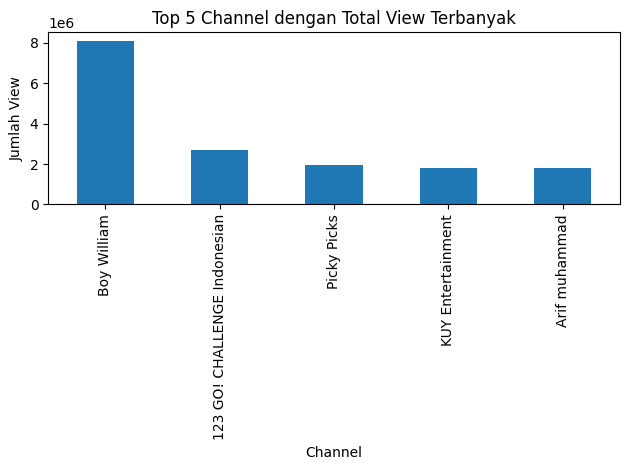

In [69]:
# 5 channel dengan total view terbanyak
top_channels = df_clean.groupby('channel_name')['view'].sum().sort_values(ascending=False).head(5)

# Visualisasi
top_channels.plot(kind='bar', title="Top 5 Channel dengan Total View Terbanyak")
plt.ylabel("Jumlah View")
plt.xlabel("Channel")
plt.tight_layout()

**6. Eksplorasi Data dengan LLM**

In [70]:
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df_clean,
    verbose=True,
    allow_dangerous_code=True,
)

In [72]:
agent.run("What is the most viewed channel?")



> Entering new AgentExecutor chain...
Thought: To find the most viewed channel, I need to identify the channel_name with the highest 'view' count. I will use the `df` dataframe and filter the 'view' column to find the maximum value and then get the corresponding channel_name.

Action: python_repl_ast

Action Input: 
```python
most_viewed_channel = df.loc[df['view'].idxmax(), 'channel_name']
```

The code executed successfully, but to provide the final answer, I need to print the result.

Action: python_repl_ast

Action Input:
```python
print(most_viewed_channel)
```

Boy William
Final Answer: The most viewed channel is named 'Boy William'.

> Finished chain.


"The most viewed channel is named 'Boy William'."